<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#-Комментарий-ревьюера-2" data-toc-modified-id="-Комментарий-ревьюера-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Комментарий ревьюера 2</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Сборный проект 1: Интернет-магазин компьютерных игр. 

Интернет-магазин "Стримчик" продает компьютерные игры по всему миру. 

Данные, содержащие информацию о продажах игр, оценках пользователей и экспертов, жанры и платформы, взяты из открытых источников.

Перед аналитиком поставлена задача выявить закономерности, которые определяют успешность игры. Анализ данных позволит определить потенциально популярные продукты и спланировать рекламные кампании. 

Данные предоставлены до 2016 года, необходимо сделать прогноз на 2017 год. 

## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt
from math import factorial

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#смотрю общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Передо мной данные о компьютерных играх, состоящие из 16715 строк. 

В данных есть пропуски в столбцах: Name, Year_of_Release, Critic_Score, User_Score, Rating.

Не все столбцы приведены к нужным типам, например, строковый тип в столбцах User_Score и Year_of_Release.

## Подготовка данных

In [4]:
#привожу названия столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)
df.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
#меняю типы данных и заполняю пропуски
#нашла пропуски в столбце год релиза

df['year_of_release'].unique()

#сделала сводную таблицу соответствия названия игры горду релиза
year_pvt = df.pivot_table(index = 'name', values = 'year_of_release', aggfunc = 'first')
year_pvt
#используя данные из сводной таблицы сделала соответствие и заполнила возможные пропуски в годе выхода игры. 
#количество пропущенных уменьшилось с 269 до 146
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'))
df['year_of_release'].isna().sum()


146

In [7]:
#остальные пропуски заполнила округленным медианным значением года для каждой платформы 
for platform in df['platform'].unique():
    median = df.loc[df['platform'] == platform, 'year_of_release'].median()
    #print(platform, median)
    df.loc[(df['year_of_release'].isna()) & (df['platform'] == platform), 'year_of_release'] = median
df['year_of_release'].isna().sum()
df['year_of_release'] = np.ceil(df['year_of_release'])
#поменяла тип данных на целочисленный, тк тут тип данных с плавающей запятой не нужен, потому что год является целым числом
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [8]:
#в столбце название два пропущенных значения, можно заменить на 0 для удобства анализа, либо вообще удалить эти строки, раз их всего 2 на 16тыс строк
#выбрала удаление этих строк, потому что заполнить эти значения нечем, а для дальнейшего анализа нужны все названия игр
df['name'].isna().sum()
df.dropna(subset = ['name'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:
#смотрю значения столбца оценки пользователей
df['user_score'].unique()
df['user_score'].value_counts()
#есть значение 'tbd' - to be determined, то есть подлежит уточнению, таких значений 2424, заменю их на пустые
df['user_score'] = df['user_score'].str.replace('tbd', 'NaN', regex = True)
#после этой замены поменяла тип данных на вещественный - он наилучшим образом подходит для оценок 
df['user_score'] = df['user_score'].astype('float')

In [10]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [11]:
df['rating'].unique()
df['rating'].value_counts()
df['rating'] = df['rating'].str.replace('K-A', 'E', regex = True)
#заменила рейтинг К-А (Kids to Adults на Everyone, так как это его прежнее название)

In [12]:
# #решила заменить все пропуски в рейтингах на -10, это будет маркером 
df = df.fillna(-10)
df.isna().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [13]:
#столбец с оценкой критиков сделала целого типа, так как все оценки были без знаков после запятой
df['critic_score'].unique()
df['critic_score'].isna().sum()
df['critic_score'] = df['critic_score'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [14]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,-10.0,-10,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,-10.0,-10,31.38


In [15]:
#проверяю на наличие полных дубликатов в данных 
df.duplicated().sum()

0

Исследовала исходные данные и пропуски в них.


Было два пропуска в названии игр, удалила эти строки, они не пригодятся для анализа и на общеую массу данных они не повлияют.

Заменила тип столбца год релиза на целочисленный, тк год является целым числом. В этом столбце постаралась заполнить часть пропусков по совпадению названия игры, остальные заменила медианой по каждой платформе. Тут нет смысла заменять их средним, да и таких строк всего 146. Конечно, есть вариант искать отдельно годы релиза по каждой игре.

Пользовательские оценки перевела в вещественный тип данных, в них есть числа после запятой.
А оценки критиков - в целочисленный тип, эти оценки представляли из себя целые числа при анализе.

Заполнила пропуски в столбцах оценок маркерами, потому что нет смысла выдумывать эти числа/обозначения, они уникальны для каждой игры.
В столбце user_score игры аббревиатуру tbd (ожидается уточнение) заменила на пропущенное значение, так как его взять неоткуда. 

Пропуски могли появиться при объединении данных из разных источников, либо для новых или непопулярных игр могли быть не обозначены пользовательские оценки и оценки критиков. 

## Исследовательский анализ данных

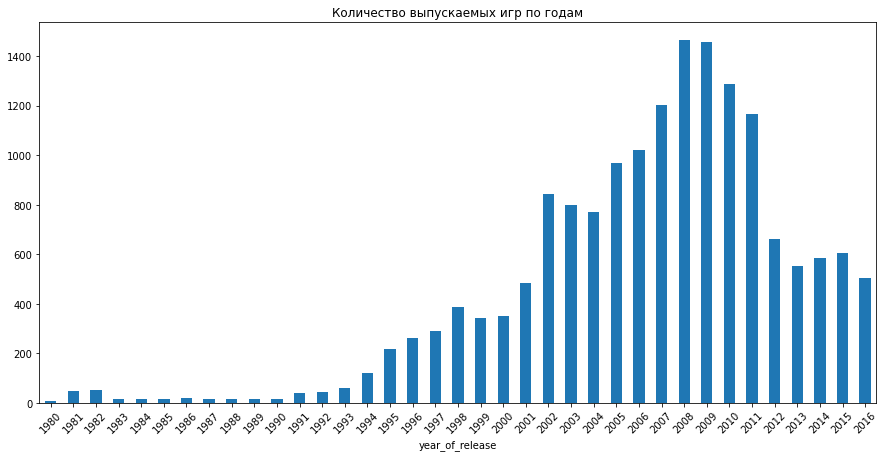

In [16]:
#смотрю количество выпускаемых игр за все годы
df.query('year_of_release != 0').pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(kind = 'bar', figsize = (15, 7), legend=None)
plt.xticks(rotation=45)
plt.title('Количество выпускаемых игр по годам')
plt.show()

Построила диаграмму с распределением количества игр по году релиза. Виден тренд с 1990 до 2009 к увеличению релизов, а после - спад и возврат к уровню начала 2000х

In [17]:
#Посмотрите, как менялись продажи по платформам. 
platform_pvt = df.query('year_of_release != 0').pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
platform_pvt

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,36.85
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
238,XB,2008,0.18
239,XOne,2013,18.96
240,XOne,2014,54.07
241,XOne,2015,60.14


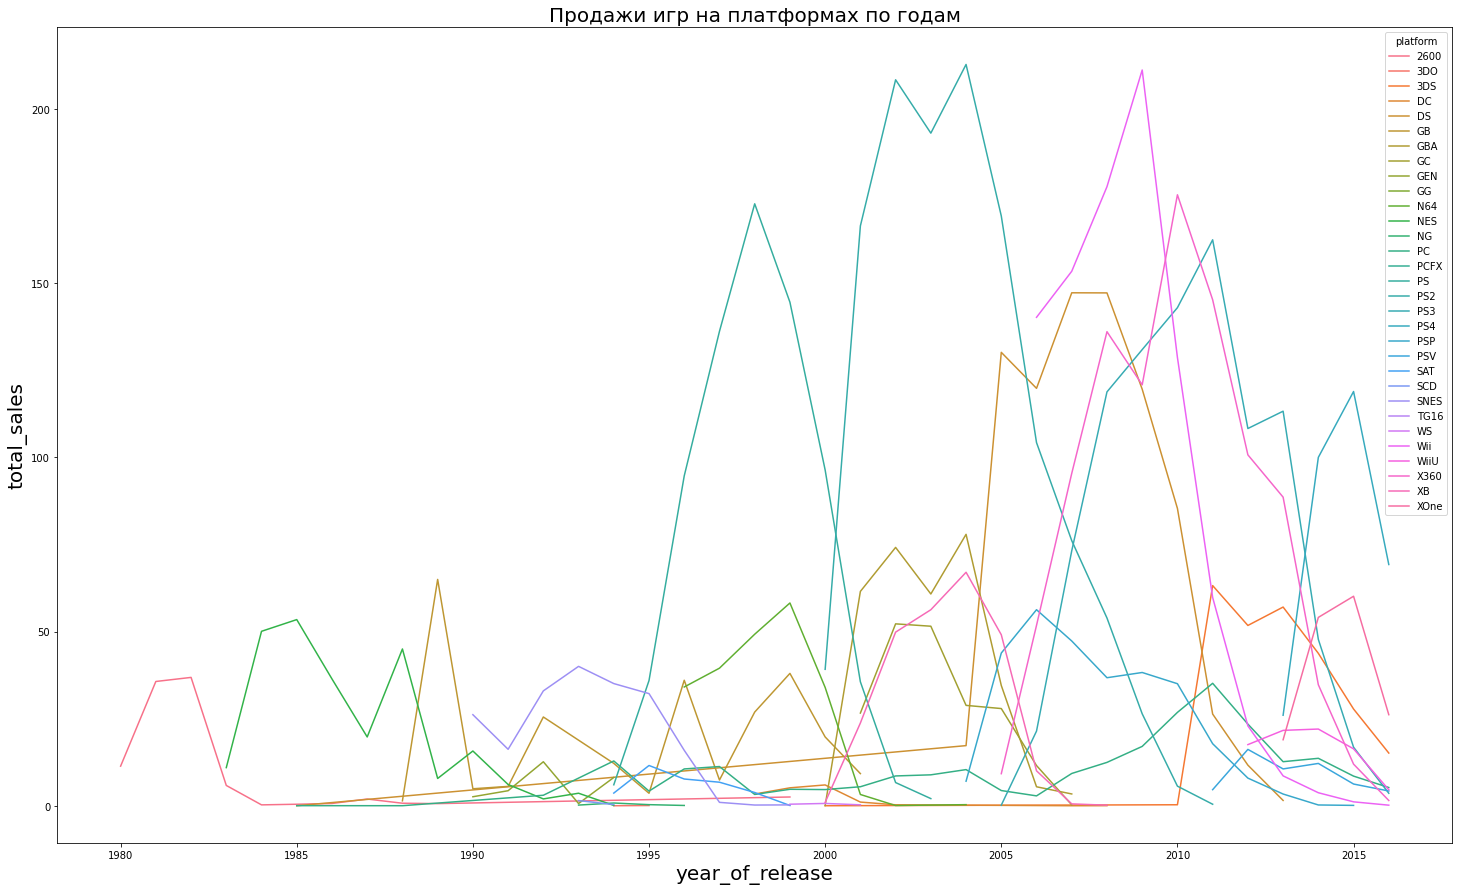

In [18]:
#строю линейный график с продажами на платформах по годам
plt.figure(figsize=(25, 15))
plt.title('Продажи игр на платформах по годам', fontsize = 20)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=platform_pvt)
plt.xlabel('year_of_release',fontsize=20)
plt.ylabel('total_sales',fontsize=20)
plt.show()

In [19]:
#Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
df_top_platform = platform_pvt.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales', ascending = False)
df_top_platform.head()

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [20]:
top5_platform = platform_pvt.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')
top5_platform.head()

,platform,year_of_release,total_sales
28,DS,1985,0.02
29,DS,2004,17.27
30,DS,2005,130.14
31,DS,2006,119.81
32,DS,2007,147.23


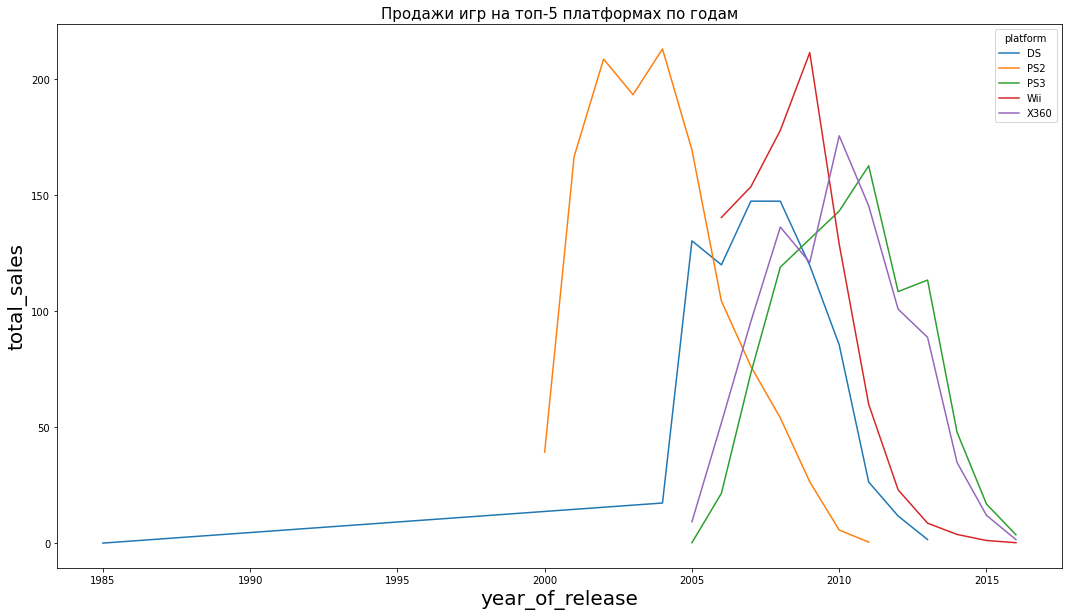

In [21]:
#строю линейный график с продажами на топ5 платформах по годам
plt.figure(figsize=(18, 10))
plt.title('Продажи игр на топ-5 платформах по годам', fontsize = 15)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top5_platform)
plt.xlabel('year_of_release',fontsize=20)
plt.ylabel('total_sales',fontsize=20)
plt.show()

In [22]:
#За какой характерный срок появляются новые и исчезают старые платформы?
platform_life = platform_pvt.groupby('platform').agg({'year_of_release': ['max', 'min']})
platform_life.columns = ['max', 'min']
platform_life['life'] = platform_life['max'] - platform_life['min']
print('Средний срок жизни платформы:', platform_life['life'].mean())


Средний срок жизни платформы: 8.387096774193548


Построила графики, как менялись продажи по платформам по годам, видно заметное увеличение продаж на некоторых платформах после 1995 года.

Выделила топ5 платформ с наибольшими результатами по продажам: "PS2", "X360", "PS3", "Wii", "DS", посмотрела их продажи по годам

Вычислила среднюю продолжительность жизни платформы - 8.4 лет 

<b> Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 
Основной фактор — эти данные помогут построить прогноз на 2017 год.</b>

Выбрала актуальным периодом данные с 2011 по 2016 год. 

Во-первых, после 2011 почти в два раза упало количество производимых игр и с 2012 до 2016 это число держится на примерно оджинаковой отметке, мне кажется, этот факт должен быть запечатлен в анализе для построения дальнейшего прогноза. 

Во-вторых, средняя продолжительность жизни платформ составляет 8.4 лет, поэтому надо, чтоб в наши данные входили и платформы, которые постепенно движутся к своему закату, и те, которые только набирают обороты, не вижу смысла брать более ранние периоды, нам нужна актуальная информация. 


In [23]:
df_actual = df.query('year_of_release >= 2011')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10,-10.0,-10,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10,-10.0,-10,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-10.0,-10,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-10,-10.0,-10,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10,-10.0,-10,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-10.0,-10,0.01


In [24]:
df_actual_pvt = df_actual.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()
df_actual_pvt.head(15)

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.76
2,3DS,2013,57.04
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DS,2011,26.33
7,DS,2012,11.67
8,DS,2013,1.54
9,PC,2011,35.16


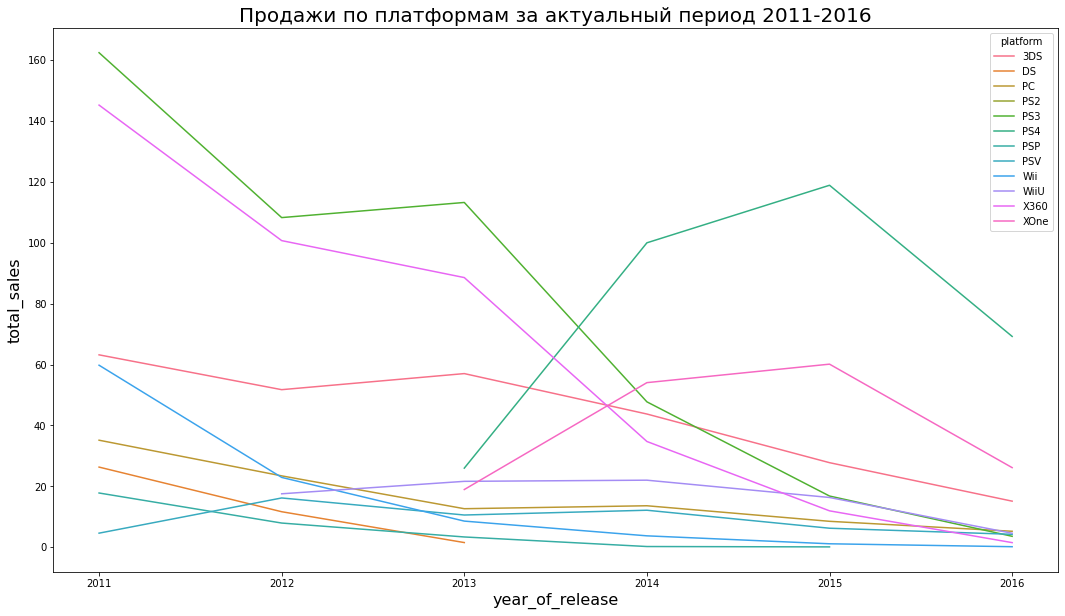

In [25]:
plt.figure(figsize=(18, 10))
plt.title('Продажи по платформам за актуальный период 2011-2016', fontsize = 20)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=df_actual_pvt)
plt.xlabel('year_of_release',fontsize=16)
plt.ylabel('total_sales',fontsize=16)
plt.show()

В выборку вошло 12 платформ. Принимаю во внимание условие о том, что данные за 2016 год неполные, построю график продаж по годам для этих платформ, исключая 2016 год.

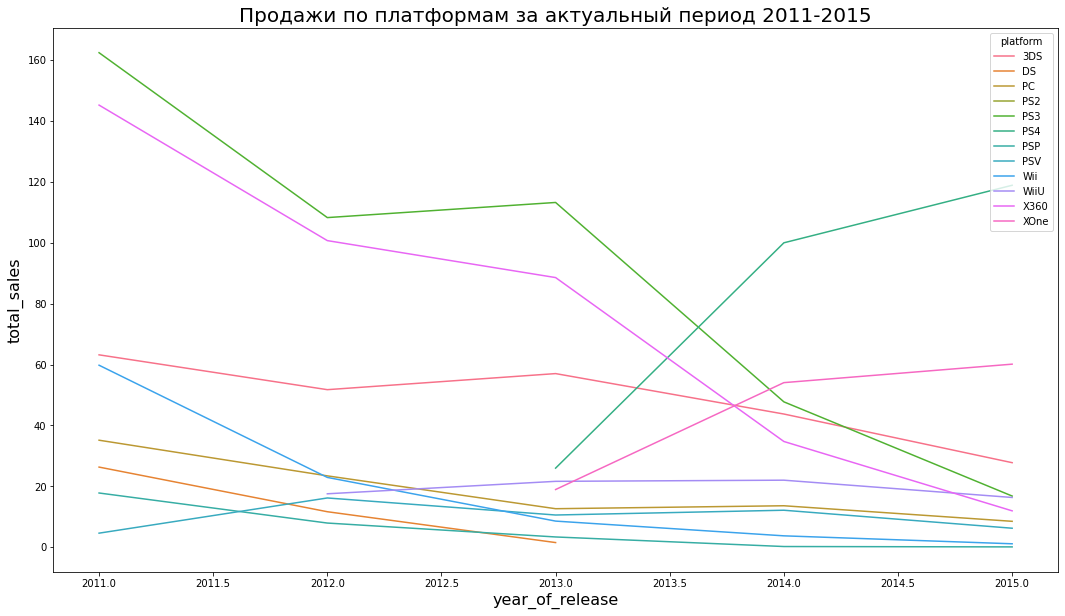

In [26]:
df_actual_pvt_not2016 = df_actual_pvt.query('year_of_release != 2016')
plt.figure(figsize=(18, 10))
plt.title('Продажи по платформам за актуальный период 2011-2015', fontsize = 20)
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=df_actual_pvt_not2016)
plt.xlabel('year_of_release',fontsize=16)
plt.ylabel('total_sales',fontsize=16)
plt.show()

In [27]:
df_actual_pvt_not2016.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.76
2,3DS,2013,57.04
3,3DS,2014,43.76
4,3DS,2015,27.78


Итого по продажам на платформах, попавших в актуальный период: 

прекратили выпуск игр: DS (в 2013), PS2 (в 2011), PSP (в 2015)

продажи падают: 3DS, PC, PS3, PSV, Wii, WiiU,  X360

продажи растут: PS4 (лидер рынка), XOne

таким образом, к потенциально прибыльным платформам можно отнести лишь две: PS4 и XOne, которые оставили конкурентов позади

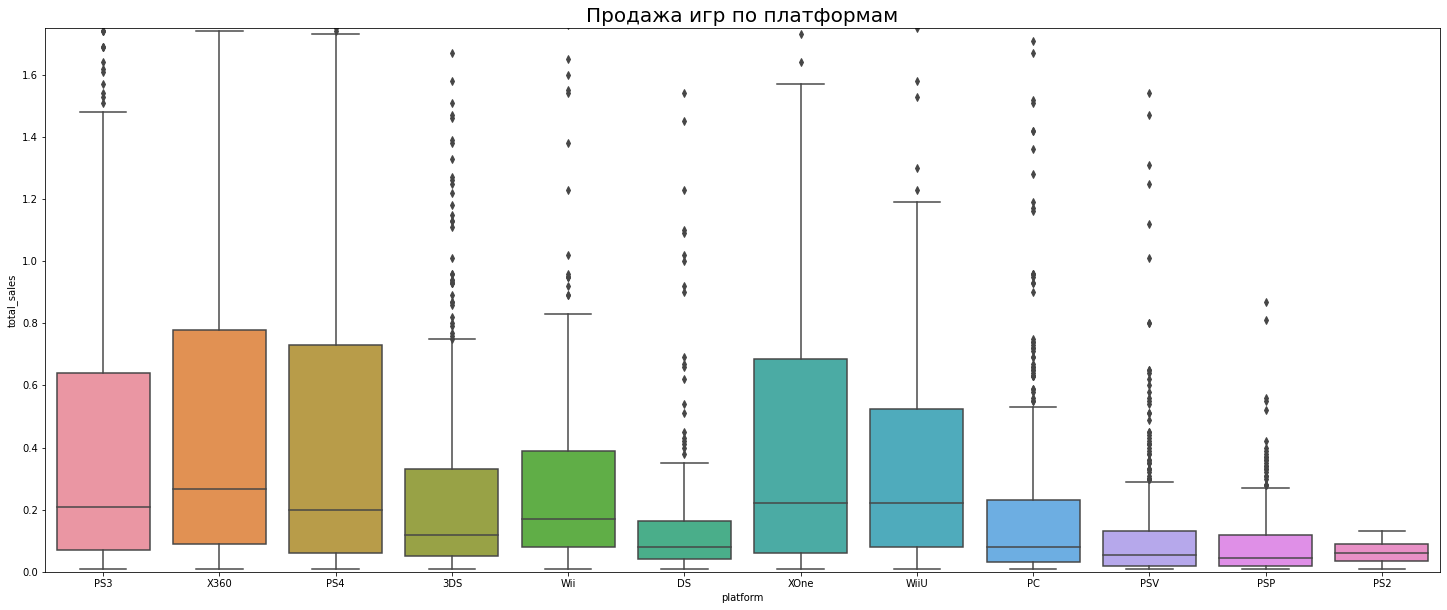

In [28]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
plt.figure(figsize = (25, 10))
plt.title('Продажа игр по платформам', fontsize = 20)
ax = sns.boxplot(x = "platform", y = "total_sales", data = df_actual)
ax.set_ylim([0, 1.75])
plt.show()

Платформы с самым большим межквартильным размахом продаж игр - PS3, X360, PS4, XOne, WiiU.

Наибольшая медианная прибыль была у X360.

Стоит помнить, что все изображенные платформы, кроме PS4 и XOne, либо прекратили выпускать игры, либо ускоренно к этому движутся. У PS4 и XOne на графиках и так хорошие результаты, но судя по данным 2015 года, они еще успеют увеличить свои продажи.

Выбросы указывают на то, что на платформах выпускались такие игры, которые продавались очень большим тиражом, но все же это случаи, выходящие за обычные рамки продаж, которые выделяюся на графиках цветом (межквартильный размах). То есть по графику видим, что у платформ PS3, X360, PS4, XOne, WiiU были выпущены такие игры, которые разошлись на 1.3-1.7 млн проданных копий, но это скорее исключение, нежели правило, так как большинство игр вписывалось в рамки 100-700тыс шт 


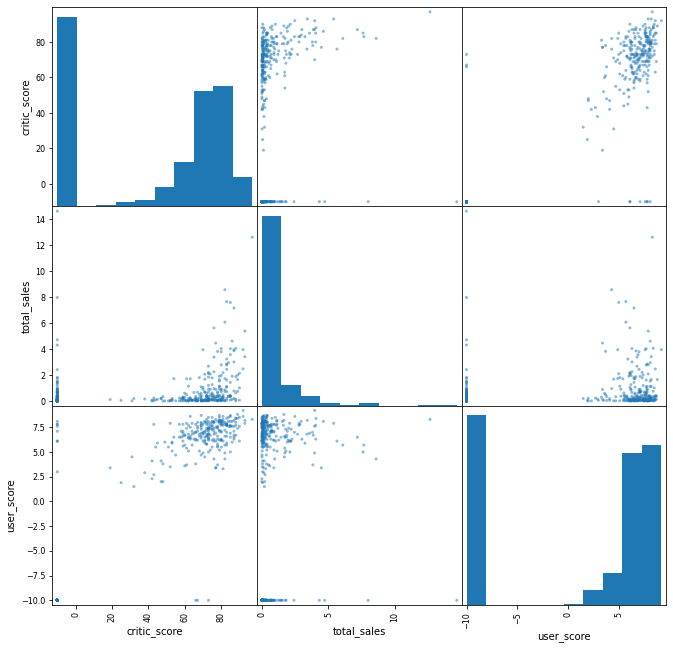

,critic_score,total_sales,user_score
critic_score,1.000000,0.218256,0.921378
total_sales,0.218256,1.000000,0.124905
user_score,0.921378,0.124905,1.000000


In [29]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
df_actual_ps4 = df_actual.query('platform == "PS4" and critic_score != "-10" and user_score != "-10"').pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(df_actual_ps4, figsize=(11, 11)) 
plt.show()
df_actual_ps4.corr()


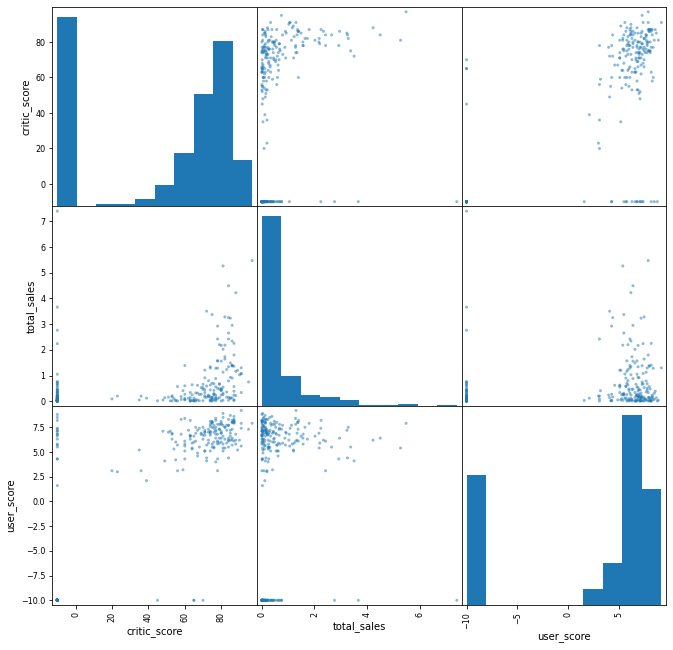

,critic_score,total_sales,user_score
critic_score,1.000000,0.265179,0.794102
total_sales,0.265179,1.000000,0.138707
user_score,0.794102,0.138707,1.000000


In [30]:
df_actual_xone = df_actual.query('platform == "XOne" and critic_score != "-10" and user_score != "-10"').pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(df_actual_xone, figsize=(11, 11)) 
plt.show()
df_actual_xone.corr()

Построила диаграммы рассеяния и посчитала корреляцию между отзывами критиков и зрителей и продажами для платформ XOne и PS4, для обеих характерно отсутствие зависимости продаж от отзывов пользователей, но есть корреляция между продажами и отзывами критиков - для обеих платформ около 0,41, хотя это нельзя все же назвать сильной зависимостью, но она явно больше, чем с пользователями. 

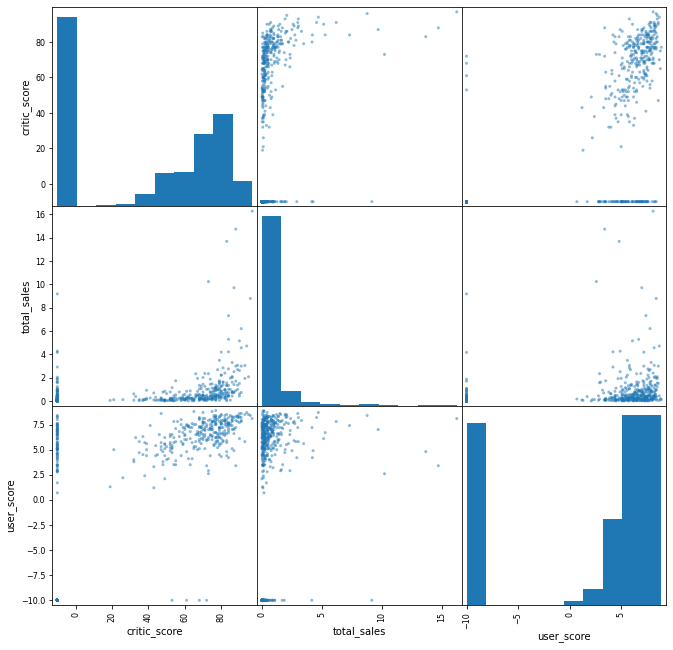

,critic_score,total_sales,user_score
critic_score,1.000000,0.306812,0.718258
total_sales,0.306812,1.000000,0.186185
user_score,0.718258,0.186185,1.000000


In [31]:
#Соотнесите выводы с продажами игр на других платформах
df_actual_x360 = df_actual.query('platform == "X360" and critic_score != "-10" and user_score != "-10"').pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(df_actual_x360, figsize=(11, 11)) 
plt.show()
df_actual_x360.corr()

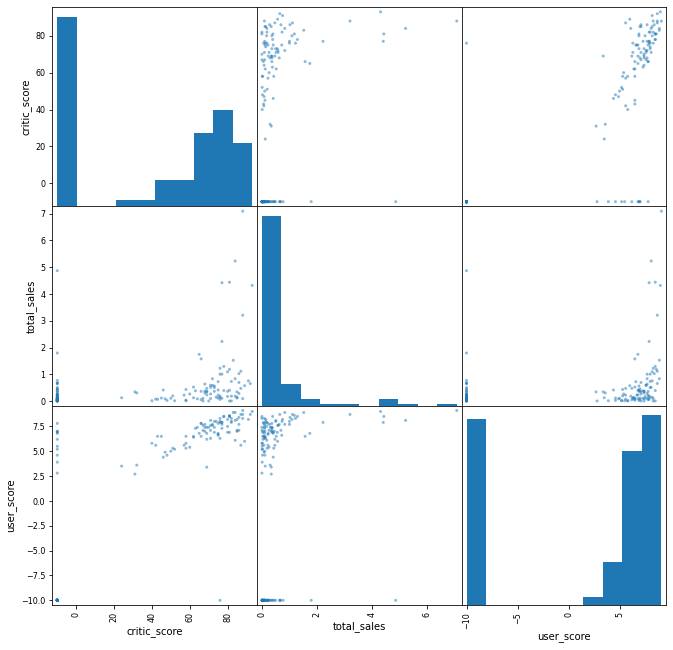

,critic_score,total_sales,user_score
critic_score,1.000000,0.289358,0.836980
total_sales,0.289358,1.000000,0.208001
user_score,0.836980,0.208001,1.000000


In [32]:
df_actual_wiiu = df_actual.query('platform == "WiiU" and critic_score != "-10" and user_score != "-10"').pivot_table(index = 'name', values = ['user_score', 'critic_score', 'total_sales'], aggfunc = 'first')
pd.plotting.scatter_matrix(df_actual_wiiu, figsize=(11, 11)) 
plt.show()
df_actual_wiiu.corr()

С платформой X360 зависимость точно такая же, а у WiiU была зависимость продаж от оценок пользователей, и эта связь примерно одинаковая с критиками 

In [33]:
#Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
#Выделяются ли жанры с высокими и низкими продажами?
df_actual_genre = df_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'sum', 'mean'])
df_actual_genre.columns = ['count', 'total_sum', 'mean_sum']
#вывожу жанры по количеству игр в них
df_actual_genre.sort_values(by = 'count', ascending = False)

,count,total_sum,mean_sum
genre,,,
Action,1290,566.94,0.439488
Role-Playing,468,245.93,0.525491
Adventure,413,45.16,0.109346
Sports,392,237.78,0.606582
Misc,383,141.53,0.369530
Shooter,333,403.03,1.210300
Racing,182,89.03,0.489176
Fighting,159,66.90,0.420755
Simulation,138,50.52,0.366087


In [34]:
df_actual_genre.sort_values(by = 'total_sum', ascending = False)

,count,total_sum,mean_sum
genre,,,
Action,1290,566.94,0.439488
Shooter,333,403.03,1.210300
Role-Playing,468,245.93,0.525491
Sports,392,237.78,0.606582
Misc,383,141.53,0.369530
Racing,182,89.03,0.489176
Platform,122,88.68,0.726885
Fighting,159,66.90,0.420755
Simulation,138,50.52,0.366087


In [35]:
df_actual_genre.sort_values(by = 'mean_sum', ascending = False)

,count,total_sum,mean_sum
genre,,,
Shooter,333,403.03,1.210300
Platform,122,88.68,0.726885
Sports,392,237.78,0.606582
Role-Playing,468,245.93,0.525491
Racing,182,89.03,0.489176
Action,1290,566.94,0.439488
Fighting,159,66.90,0.420755
Misc,383,141.53,0.369530
Simulation,138,50.52,0.366087


При сортировке данных по количеству игр в них сильно выделяется жанр Action, в три раза меньше у Role-Playing, Adventure, Sports, Misc, в остальных жанрах выпускается гораздо меньше игр.

Больше всего платформы заработали на играх жанра Action	(не удивительно, так как таких игр в три раза больше, чем остальных), на втором месте - Shooter, хотя эти игры не попали в топ5 по количеству. Меньше всего заработано на играх жанра Puzzle (их и было меньше всего в нашей выборке)

Добавила столбец со средним значением прибыли по жанрам, тут самые высокие показатели у жанра Shooter, а наименьшие у Puzzle и Adventure. Adventure несмотря на количество игр в этом жанре, приносят наименьшее число денег в среднем, и в тотале тоже меньше по сравнению с конкурентами

## Составление портрета пользователя каждого региона

In [36]:
#Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.
#платформы в NA
df_actual_na = df_actual[['platform', 'genre', 'na_sales']]
df_actual_na.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
platform,
X360,228.18
PS3,170.85
PS4,108.74
XOne,93.12
3DS,83.21


In [37]:
#платформы в EU
df_actual_eu = df_actual[['platform', 'genre', 'eu_sales']]
df_actual_eu.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
platform,
PS3,165.47
PS4,141.09
X360,117.87
3DS,61.48
PC,57.38


In [38]:
#платформы в JP
df_actual_jp = df_actual[['platform', 'genre', 'jp_sales']]
df_actual_jp.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
platform,
3DS,100.65
PS3,50.07
PSP,24.28
PSV,21.91
PS4,15.96


В Японии на первом месте платформа 3DS - производство Nintendo, Япония, а остальное от Sony, тоже Япония, думаю, этим объясняется такое распределение продаж по платформам.
В Северной Америке на первом месте X360	- производства Майкрософт, США, то есть логика такая же. 
Европа больше приносит продаж по PS, но мне не приходит на ум, с чем это может быть связано 

In [39]:
#Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.
#жанры в NA
df_actual_na.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
Action,234.92
Shooter,194.49
Sports,108.86
Role-Playing,83.89
Misc,70.80


In [40]:
#жанры в EU
df_actual_eu.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Action,202.58
Shooter,148.07
Sports,88.83
Role-Playing,62.35
Racing,40.92


In [41]:
#жанры в JP
jp_genres = df_actual_jp.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
jp_genres

,jp_sales
genre,
Role-Playing,79.98
Action,64.26
Misc,17.85
Fighting,12.38
Platform,12.13


В Америке и Европе совпадают первые 4 жанра в топ-5, в то время как в Японии топ-5 сильно отличается, на первом месте - Role-Playing, думаю, что это обусловлено традициями стран и менталитетом 

In [42]:
#Определите для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
df_actual_esrb = df_actual.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum', 'mean'])
df_actual_esrb

sum                        mean                    
       eu_sales jp_sales na_sales  eu_sales  jp_sales  na_sales
rating                                                         
-10      116.83   138.52   124.04  0.067846  0.080441  0.072033
E        141.95    36.68   170.53  0.227849  0.058876  0.273724
E10+      79.88    11.23   120.03  0.172155  0.024203  0.258685
EC         0.00     0.00     0.42  0.000000  0.000000  0.420000
M        251.67    26.78   309.65  0.398843  0.042441  0.490729
RP         0.03     0.00     0.00  0.030000  0.000000  0.000000
T         84.31    33.47   111.30  0.134466  0.053381  0.177512

Суммарно самые продаваемые игры в Европе с рейтингом M (17+) - 251млн копий, E (Everyone) - 142 млн и много продаж не удалось распределить из-за пропуска в данных, которые помечены маркером.

В Японии самое большое количество у промаркированных игр, рейтинг которых из данных нам, к сожалению, узнать не удалось. Если не смотреть на эти продажзи, то первенство делят игры возрастных категорий Е - для всех, Т - для тинейджеров, М - 17+.

В Северной Америке тоже большое количество продаж невозможно распределить по рейтингам. Пальма первенства у игр с возрастным ограничением M - 17+.

Игры категории EC (Early Childhood) в ЕС и Японии не показывают продаж, а в США прожади были, но совсем малым количеством экземпляров. 
Категория с еще не определенным рейтингом также не показывает продаж, скорее всего, эти игры новые и по ним на момент выгрузки не было данных. 
Категория Adults Only вообще не вошла в нашу подборку данных за актуальный период. 


## Проверка гипотез

In [44]:
#Проверьте гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
#проверяю схожесть дисперсий для определения параметра equeal_var
xone_user_rating = df_actual.query('platform == "XOne" and user_score != "-10"')
pc_user_rating = df_actual.query('platform == "PC" and user_score != "-10"')
print('Дисперсия рейтингов Xbox One:', xone_user_rating['user_score'].var())
print('Дисперсия рейтингов PC:', pc_user_rating['user_score'].var()) 

Дисперсия рейтингов Xbox One: 54.54633718442447
Дисперсия рейтингов PC: 46.67258969441248


Буду использовать Гипотезу о равенстве средних двух генеральных совокупностей, используя метод scipy.stats.ttest_ind (array1, array2, equal_var). Так как выборки не парные, а независимые друг от друга.

В equal_var передам False, так как дисперсии разные. Хотя, они отличаются не кардинально, в итоге перепроверила и с параметром и без, результат одинаковый

Гипотезы:

H0 - средние пользовательские рейтинги платформ Xbox One и PC равны

H1 - средние пользовательские рейтинги платформ Xbox One и PC различаются

Критический уровень статистической значимости 0.05, исходя из общепринятых пороговых значений

In [45]:
alpha = 0.05 
results = st.ttest_ind(df_actual.query('platform == "XOne" and user_score != "-10"')['user_score'], df_actual.query('platform == "PC" and user_score != "-10"')['user_score'], equal_var = False)
print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.129898924421613
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось отвергнуть стат.тестом

In [46]:
#сравниваю пользовательские оценки для платформ без стат.теста 
df_actual.query('platform in ("XOne", "PC") and user_score != "-10"').pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean')

,user_score
platform,
PC,3.056566
XOne,2.173684


In [47]:
#Проверьте гипотезу: Средние пользовательские рейтинги жанров Action и Sports;
#проверяю схожесть дисперсий для определения параметра equeal_var
action_user_rating = df_actual.query('genre == "Action" and user_score != "-10"')
sports_user_rating = df_actual.query('genre == "Sports" and user_score != "-10"')
print('Дисперсия рейтингов Action:', action_user_rating['user_score'].var())
print('Дисперсия рейтингов Sports:', sports_user_rating['user_score'].var()) 

Дисперсия рейтингов Action: 71.26470194429909
Дисперсия рейтингов Sports: 59.0876501252675


Буду использовать Гипотезу о равенстве средних двух генеральных совокупностей, используя метод scipy.stats.ttest_ind (array1, array2). Так как выборки не парные, а независимые друг от друга.


Гипотезы:

H0 - средние пользовательские рейтинги жанров Action и Sports равны

H1 - средние пользовательские рейтинги жанров Action и Sports различаются

Критический уровень статистической значимости 0.05, исходя из общепринятых пороговых значений

In [48]:
alpha = 0.05 
results = st.ttest_ind(df_actual.query('genre == "Action" and user_score != "-10"')['user_score'], df_actual.query('genre == "Sports" and user_score != "-10"')['user_score'])
print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.02907844949333976
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнута стат.тестом

In [49]:
#сравниваю пользовательские оценки для платформ без стат.теста 
df_actual.query('genre in ("Action", "Sports") and user_score != "-10"').pivot_table(index = 'genre', values = 'user_score', aggfunc = 'mean')

,user_score
genre,
Action,-1.177054
Sports,-0.134949


## Общий вывод

Проанализировала выпуск игр по годам за все время. Виден тренд с 1990 до 2009 к увеличению релизов, а после - спад и возврат к уровню начала 2000х, с 2012 количество выпускаемых игр упало почти в два раза по сравнению с пиком 2008-2009 годов.  

При визуализации данных о продажах за все время видно заметное увеличение продаж на некоторых платформах после 1995 года. <b>В топ5 платформ с наибольшими результатами по продажам вошли: "PS2", "X360", "PS3", "Wii", "DS". </b>

Выделила примерный <b>срок, за который исчезают старые и появляются новые платформы - 8.7 лет</b>, на основании этих данных выбрала актуальный период для построения дальнейшего прогноза: 

Выбрала <b>актуальным периодом данные с 2011 по 2016 год</b>, руководствуясь следующими наблюдениями: после 2011 почти в два раза упало количество производимых игр, и с 2012 до 2016 это число держится на примерно одинаковой отметке, этот факт должен быть запечатлен в анализе для построения дальнейшего прогноза, более того, средняя продолжительность жизни платформ составляет 8.7 лет, поэтому надо, чтоб в наши данные входили и платформы, которые постепенно движутся к своему закату, и те, которые только набирают обороты.

В эту выборку вошло 12 платформ, среди них:

прекратили выпуск игр: DS (в 2013), PS2 (в 2011), PSP (в 2015)

продажи падают: 3DS, PC, PS3, PSV, Wii, WiiU, X360

<b>продажи растут: PS4 (лидер рынка), XOne.</b>

Таким образом, к потенциально прибыльным платформам можно отнести лишь две: PS4 и XOne, которые оставили конкурентов позади.

При анализе продаж на этих платформах, было обнаружено, что PS3, X360, PS4, XOne, WiiU являются платформами платформы с самым большим межквартильным размахом продаж игр, а наибольшая медианная прибыль была зафиксирована у X360.

Стоит помнить, что рассматриваемые платформы, кроме PS4 и XOne, либо прекратили выпускать игры, либо ускоренно к этому движутся. У PS4 и XOne показали хорошие результаты по продажам и, судя по данным 2015 года, они еще успеют их увеличить.

Исследовала зависимость между отзывами критиков и зрителей и продажами для платформ XOne и PS4, для обеих характерно отсутствие зависимости продаж от отзывов пользователей, но есть корреляция между продажами и отзывами критиков - для обеих платформ около 0,41, хотя это нельзя все же назвать сильной зависимостью, но она явно больше, чем с пользователями. С платформой X360 зависимость точно такая же, а у WiiU была зависимость продаж от оценок пользователей, и эта связь примерно одинаковая с критиками.

При сортировке данных по количеству игр в них сильно выделяется жанр Action, в три раза меньше у Role-Playing, Adventure, Sports, Misc, в остальных жанрах выпускается гораздо меньше игр.

<b>Больше всего платформы заработали на играх жанра Action (не удивительно, так как таких игр в три раза больше, чем остальных), на втором месте - Shooter, хотя эти игры не попали в топ5 по количеству.</b> Меньше всего заработано на играх жанра Puzzle (их и было меньше всего в нашей выборке по количеству).

<b>При анализе средних значенией прибыли по жанрам самые высокие показатели были обнаружены у жанра Shooter, а наименьшие у Puzzle и Adventure.</b> Adventure, несмотря на количество игр в этом жанре, приносят наименьшее число денег в среднем, и в тотале тоже меньше по сравнению с конкурентами.

При анализе среза продаж по платформам в Японии, ЕС и Америке, было обнаружено, что в Японии на первом месте платформа 3DS - производство Nintendo, Япония, а остальные от Sony, тоже Япония, думаю, этим объясняется такое распределение продаж по платформам. В Северной Америке на первом месте X360 - производства Майкрософт, США, то есть логика такая же. Европа больше приносит продаж по PS.

Также было проанализировано, каким жанрам тдают предпочтения пользователи из этих стран, В Америке и Европе совпадают первые 4 жанра в топ-5 - Action, Shooter, Sports, Role-Playing, в то время как в Японии топ-5 сильно отличается, на первом месте - Role-Playing, думаю, что это обусловлено традициями стран и менталитетом. 

<b>Были выдвинуты и проверены статистические гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и о равенстве средних пользовательских рейтингов жанров Action и Sports. </b>

Первую не получилось отвергнуть, и если гипотезу отвергнуть не получилось, это не значит, что мы ее будем принимать. Но у нас были все данные для проверки этого вручную, и выяснилось, что средние пользовательские оценки для этих платформ равны. Это может быть обусловлено тем, что игры для обеих платформ выпускаются одним производителем - Microsoft, только отличается устройство - компьютер или приставка, пользователи их оценивают одинаково.

Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута при проведении стат.теста. При с равнении вручную действительно игры жанра Action превосходят в оценках юзеров спортивные игры. 

<b>Таким образом, потенциально прибыльными на момент 2016 года являлись платформы XOne и PS4. А при выпуске игр необходимо оценивать:
- географический аспект - разность восприятия может быть обусловлена страной пользователей
- жанр выпускаемой игры, самые прибыльные - Action, Shooter, Sports, Role-Playing </b>

## Чек-лист готовности проекта

- [x]  Откройте файл с данными;
- [x]  Изучите общую информацию;
- [x]  Замените названия столбцов (приведите к нижнему регистру);
- [x]  Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x]  Обработайте пропуски при необходимости;
- [x]  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x]  Опишите причины, которые могли привести к пропускам;
- [x]  Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [x]  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
- [x]  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x]  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x]  Не учитывайте в работе данные за предыдущие годы.
- [x]  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x]  Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x]  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x]  Соотнесите выводы с продажами игр на других платформах.
- [x]  Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x]  Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x]  Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.
- [x]  Определите для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- [x]  Проверьте гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x]  Проверьте гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x]  Поясните: Как вы сформулировали нулевую и альтернативную гипотезы;
- [x]  Поясните: Какой критерий применили для проверки гипотез и почему.
- [x]  Есть общий вывод
- [x]  Есть вывод в каждом разделе